In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import h5py as h5

import re
import astropy.units as u
from scipy.spatial import cKDTree
from numba import njit, prange
from scipy.interpolate import interp1d
import matplotlib as mpl
from scipy.optimize import root_scalar
import glob
import agama

from pyMND.forcetree import construct_tree, force_treeevaluate_loop

from rbf.interpolate import KNearestRBFInterpolant
from sklearn.cluster import KMeans
from joblib import Parallel, delayed

time_conv = 977.79222167
G = 43018.7

In [2]:
def read_torques(name, lvl, idx):
    bpath = '/n/home01/abeane/starbar/plots/torques/data/torques_'
    
    fname = bpath + name + '-' + lvl + '/torques_' + name + '-' + lvl + '.' + str(idx) + '.hdf5'
    return h5.File(fname, mode='r')
    

In [3]:
t_N = read_torques('Nbody', 'lvl3', 800)

In [14]:
mass = t_N['parameters'].attrs['MassTable'][1]

In [7]:
tz_halo = np.cross(t_N['pos_halo'], t_N['acc_halo'])[:,2]
pos_halo = t_N['pos_halo'][:]

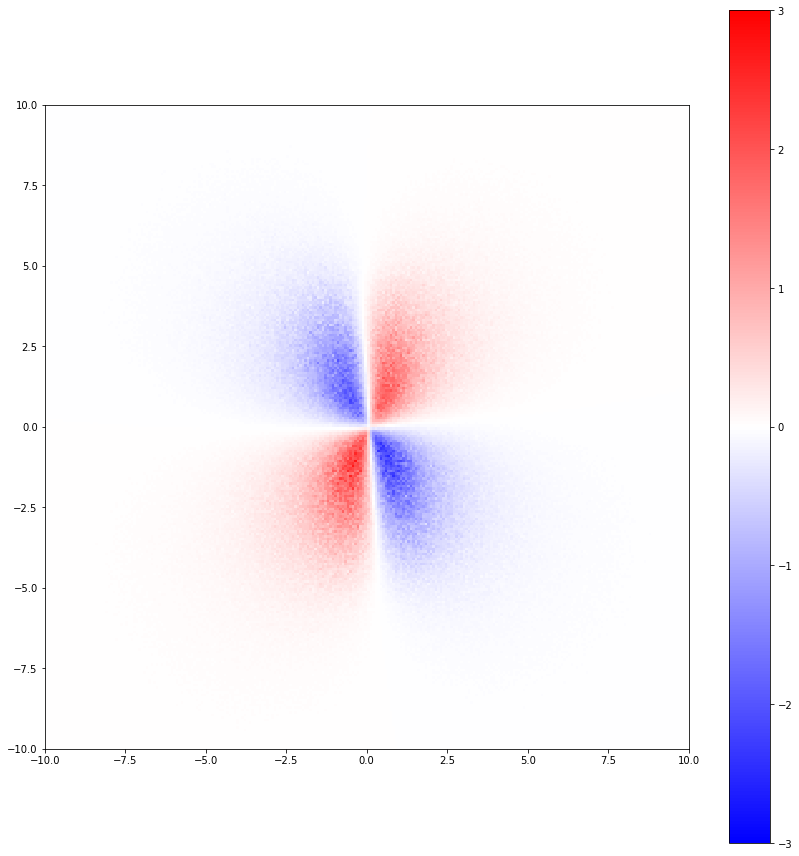

In [17]:
nres = 256

range_xy = [[-10, 10], [-10, 10]]

x = pos_halo[:,0]
y = pos_halo[:,1]
heatmap_xy, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass * tz_halo)

extent = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

im = ax.imshow(heatmap_xy.T, extent=extent, origin='lower', cmap='bwr', vmin=-3, vmax=3)#, vmin=-0.2, vmax=0.2)#, vmin=-50000, vmax=50000)
ax.set_aspect('equal')
fig.colorbar(im)

fig.tight_layout()

plt.show()


In [19]:
np.sum(mass * tz_halo)

66.95105258235542